# HR 7495 Magnetic Spot Study using Starry

In [2]:
import starry
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import exoplanet as xo
import pymc3 as pm
import pymc3_ext as pmx
from corner import corner

starry.config.lazy = False
starry.config.quiet = True

In [43]:
## Things we'll assume are known (HR7495)
inc = 21.0 # Inclination
P = 1.447  # d (spike period)
vrot = 113 # km/s
radius = 3.3 # Rsun
Aspike = 173.3 # ppm

## Spot Properties
truth = dict(contrast=-0.001, radius=30, lat=60, lon=30) # Negative Contrast = Bright Spot

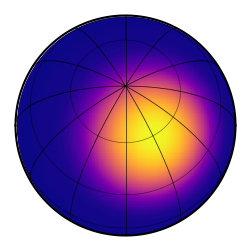

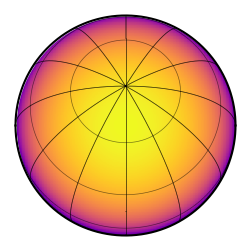

In [44]:
map = starry.Map(ydeg=10, udeg=2, rv=True)
map.inc = inc
map.spot(
    contrast=truth["contrast"],
    radius=truth["radius"],
    lat=truth["lat"],
    lon=truth["lon"],
)
map.show(rv=False)

# Limb Darkening
map[1] = 0.5
map[2] = 0.25

map.show(rv=False)


In [45]:
map.obl = 0
map.veq = vrot*1000 # in m/s
#map.alpha = 0.3

In [46]:
map.show(rv=False, theta=np.linspace(0, 360, 50))
map.show(rv=True, theta=np.linspace(0, 360, 50))

## Generate Light Curve for Bright Spot

In [51]:
# Generate Synthetic Light Curve with some noise
t = np.linspace(0, 3.0, 500)
flux0 = map.flux(theta=360.0 / P * t)
np.random.seed(0)
flux_err = 2e-5
flux = flux0 + flux_err * np.random.randn(len(t))

# Compute the  RV signal

t = np.linspace(0, 3.0, 500)
rv0 = map.rv(theta=360.0 / P * t)
np.random.seed(0)
rv_err = 5e-1
rv = rv0 + rv_err * np.random.randn(len(t))


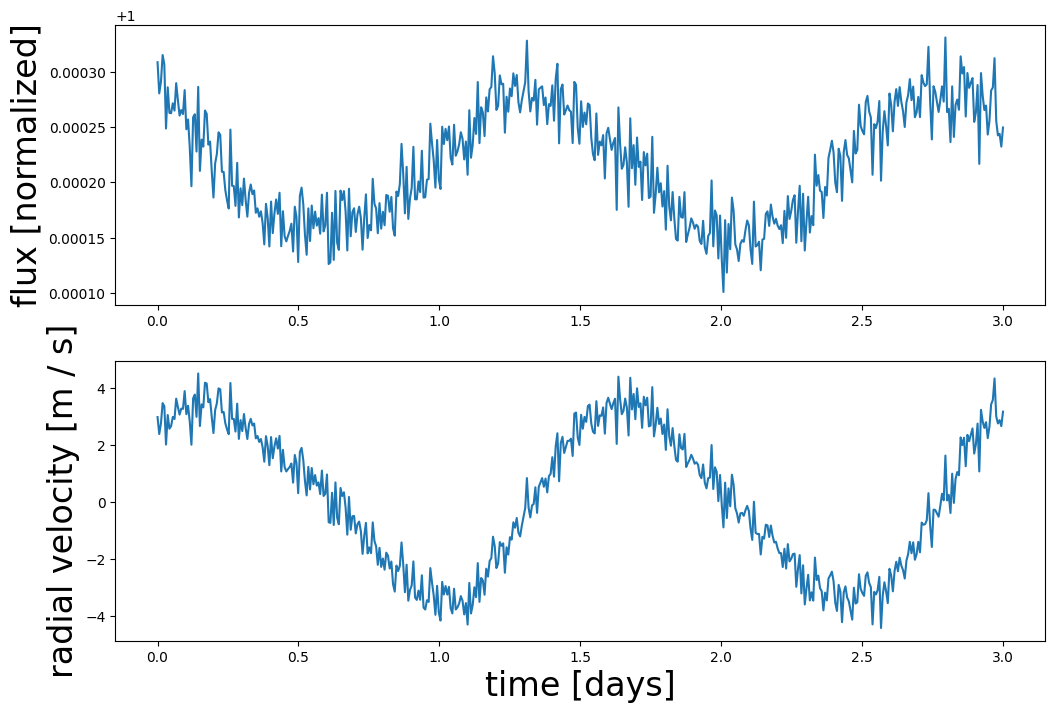

In [52]:
# Plot it
fig, ax = plt.subplots(2, figsize=(12, 8))
ax[0].plot(t, flux)
ax[1].plot(t, rv)
ax[1].set_xlabel("time [days]", fontsize=24)
ax[0].set_ylabel("flux [normalized]", fontsize=24)
ax[1].set_ylabel("radial velocity [m / s]", fontsize=24);

## Generate Light Curve for Dark Spot

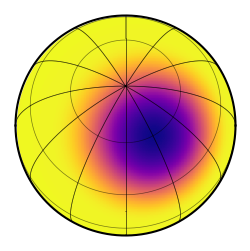

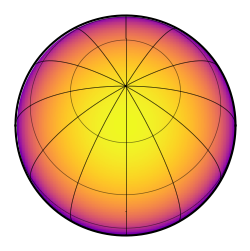

In [76]:
mapd = starry.Map(ydeg=10, udeg=2, rv=True)
mapd.inc = inc
mapd.spot(
    contrast=+0.001,
    radius=truth["radius"],
    lat=truth["lat"],
    lon=truth["lon"],
)
mapd.show(rv=False)
mapd.show(rv=False, theta=np.linspace(0, 360, 50))

# Limb Darkening
mapd[1] = 0.5
mapd[2] = 0.25

mapd.show(rv=False)


mapd.obl = 0
mapd.veq = vrot*1000 # in m/s
#map.alpha = 0.3

In [55]:
# Generate Synthetic Light Curve with some noise
t = np.linspace(0, 3.0, 500)
flux0d = mapd.flux(theta=360.0 / P * t)
np.random.seed(0)
flux_errd = 2e-5
fluxd = flux0d + flux_errd * np.random.randn(len(t))

# Compute the  RV signal

t = np.linspace(0, 3.0, 500)
rv0d = mapd.rv(theta=360.0 / P * t)
np.random.seed(0)
rv_errd = 5e-1
rvd = rv0d + rv_errd * np.random.randn(len(t))


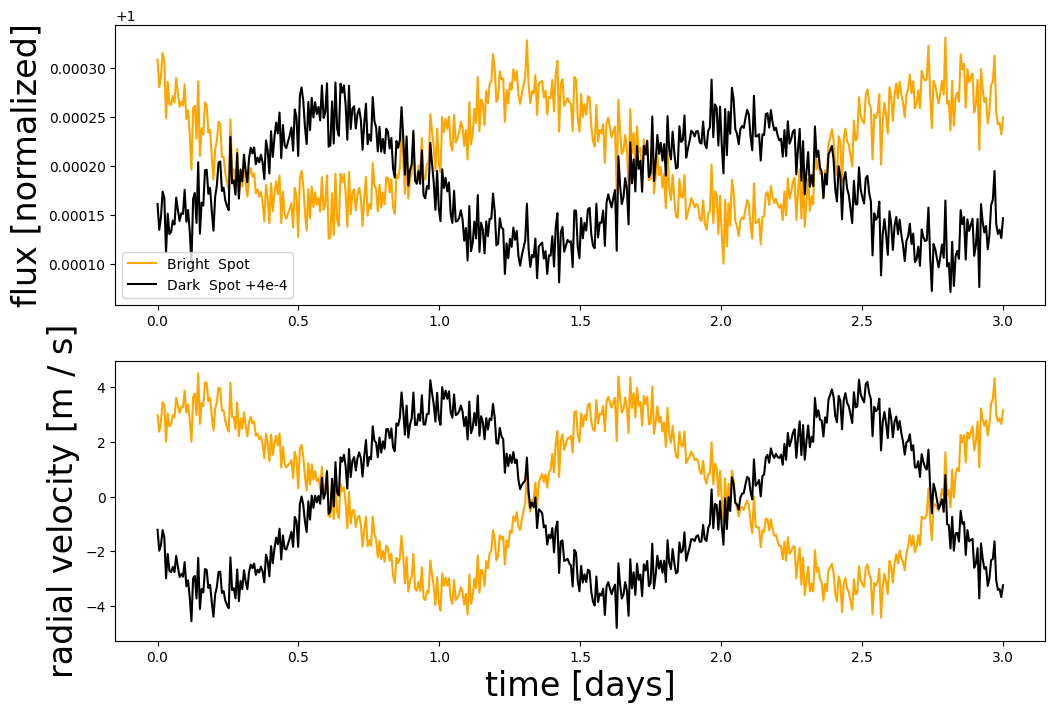

In [74]:
# Plot it
fig, ax = plt.subplots(2, figsize=(12, 8))
ax[0].plot(t, flux,label='Bright  Spot',color='orange')
ax[1].plot(t, rv,color='orange')
ax[0].plot(t, fluxd+0.0004,label='Dark  Spot +4e-4',color='black')
ax[1].plot(t, rvd,color='black')
ax[1].set_xlabel("time [days]", fontsize=24)
ax[0].set_ylabel("flux [normalized]", fontsize=24)
ax[1].set_ylabel("radial velocity [m / s]", fontsize=24)
ax[0].legend()


## Retrieve the Lightcurve

In [77]:
import lightkurve as lk

In [78]:
search_result = lk.search_targetpixelfile('HR 7495', mission='TESS')

In [82]:
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 14,2019,SPOC,120,271545295,0.0
1,TESS Sector 15,2019,SPOC,120,271545295,0.0
2,TESS Sector 40,2021,SPOC,120,271545295,0.0
3,TESS Sector 41,2021,SPOC,120,271545295,0.0
4,TESS Sector 55,2022,SPOC,120,271545295,0.0
5,TESS Sector 74,2024,SPOC,120,271545295,0.0
6,TESS Sector 75,2024,SPOC,120,271545295,0.0
7,TESS Sector 14,2019,TESS-SPOC,1800,271545295,0.0
8,TESS Sector 15,2019,TESS-SPOC,1800,271545295,0.0


In [117]:
#tpf = search_result.download(quality_bitmask='default',sector=55)
tpf = search_result.download_all(quality_bitmask='default')

In [118]:
tpf

TargetPixelFileCollection of 12 objects:
    0: TessTargetPixelFile(TICID: 271545295)
    1: TessTargetPixelFile(TICID: 271545295)
    2: TessTargetPixelFile(TICID: 271545295)
    3: TessTargetPixelFile(TICID: 271545295)
    4: TessTargetPixelFile(TICID: 271545295)
    5: TessTargetPixelFile(TICID: 271545295)
    6: TessTargetPixelFile(TICID: 271545295)
    7: TessTargetPixelFile(TICID: 271545295)
    8: TessTargetPixelFile(TICID: 271545295)
    9: TessTargetPixelFile(TICID: 271545295)
    10: TessTargetPixelFile(TICID: 271545295)
    11: TessTargetPixelFile(TICID: 271545295)

In [121]:
tpf.plot(aperture_mask=tpf.pipeline_mask);

AttributeError: 'TargetPixelFileCollection' object has no attribute 'pipeline_mask'

In [122]:
lc = tpf.to_lightcurve()
lc.errorbar();

AttributeError: 'TargetPixelFileCollection' object has no attribute 'to_lightcurve'

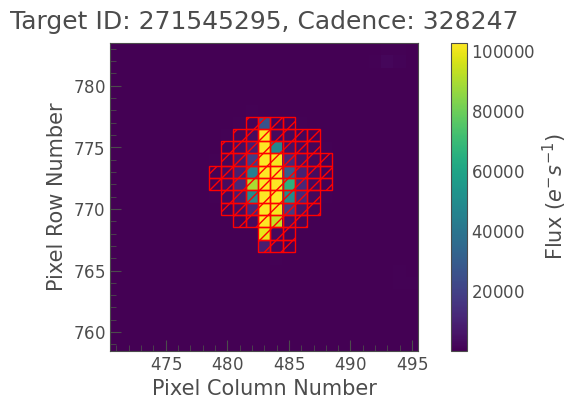

In [108]:
aperture_mask = tpf.create_threshold_mask(threshold=10)

# Plot that aperture
tpf.plot(aperture_mask=aperture_mask);

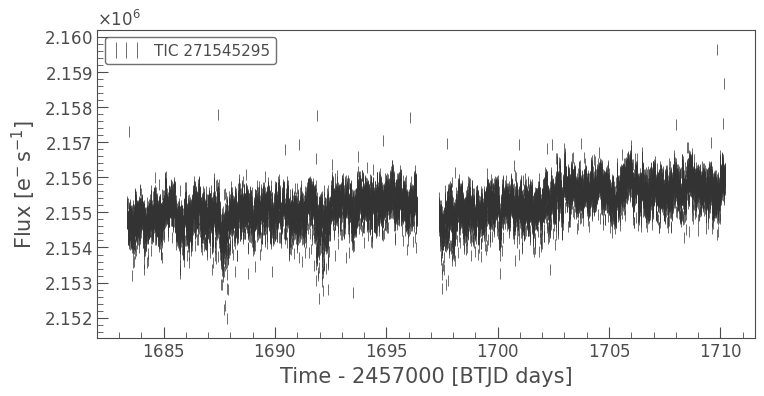

In [109]:
lc = tpf.to_lightcurve(aperture_mask=aperture_mask)
lc.errorbar();


In [110]:
# Number of cadences in the full light curve
print(lc.time.shape)

(18424,)


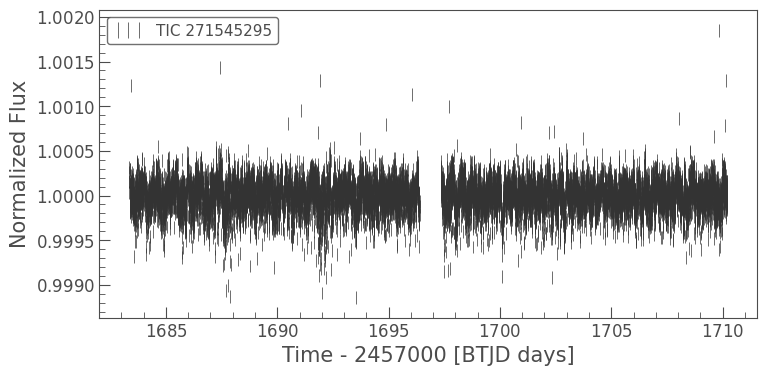

In [111]:
flat_lc = lc.flatten(window_length=1001)
flat_lc.errorbar();

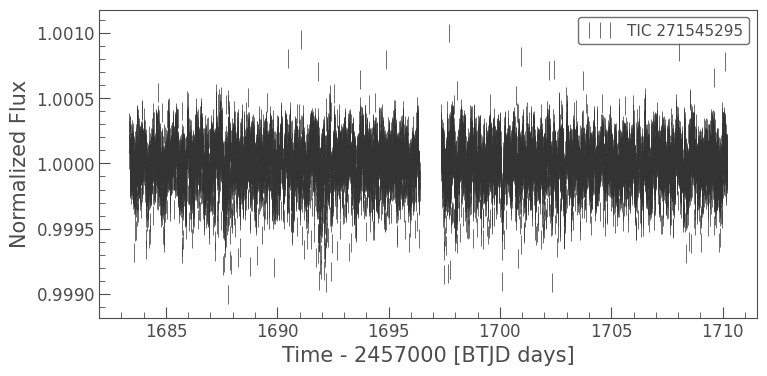

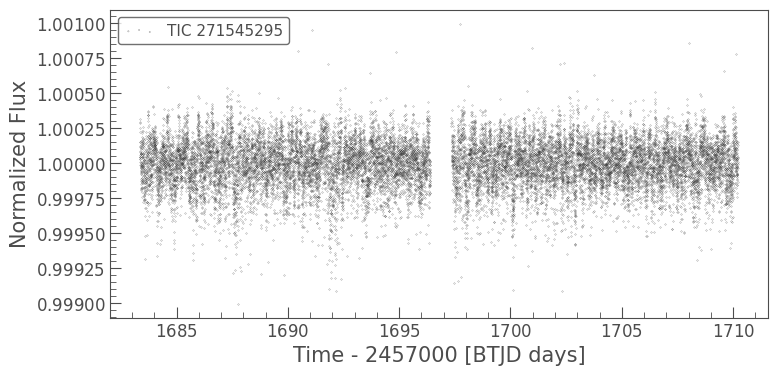

In [112]:
clipped_lc = flat_lc.remove_outliers(sigma=6)
clipped_lc.errorbar();
clipped_lc.scatter(s=0.1);

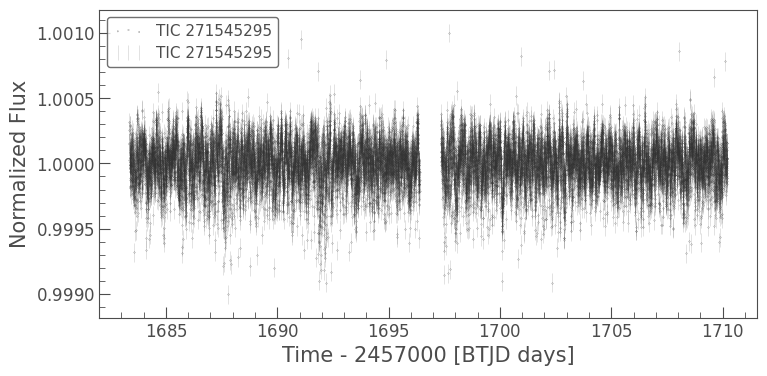

In [113]:
ax = clipped_lc.scatter(s=0.1)
clipped_lc.errorbar(ax=ax, alpha=0.2);  # alpha determines the transparency

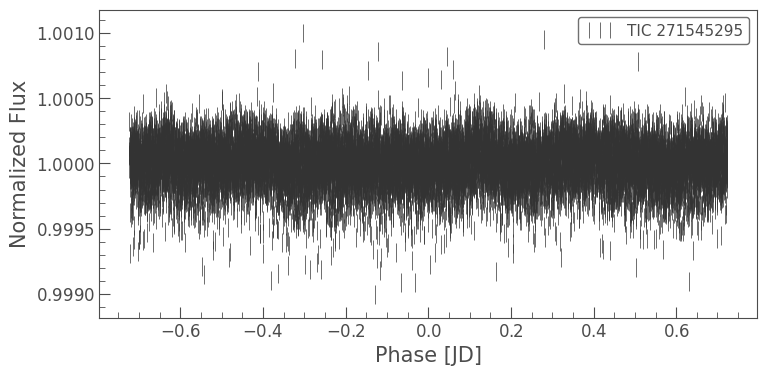

In [114]:
folded_lc = clipped_lc.fold(period=P, epoch_time=1685)
folded_lc.errorbar();

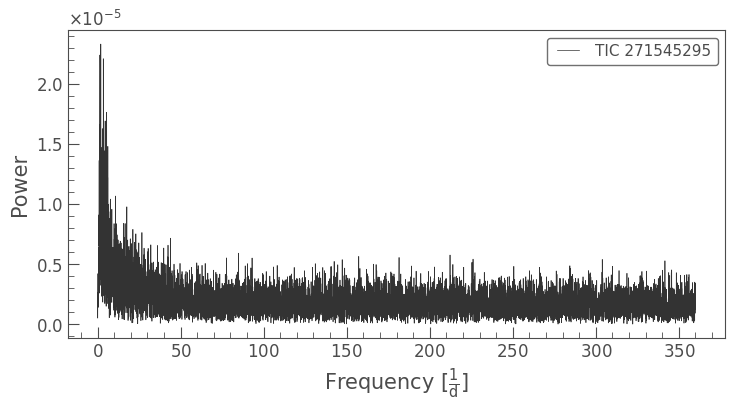

In [115]:
pg = clipped_lc.to_periodogram(oversample_factor=1)
pg.plot();


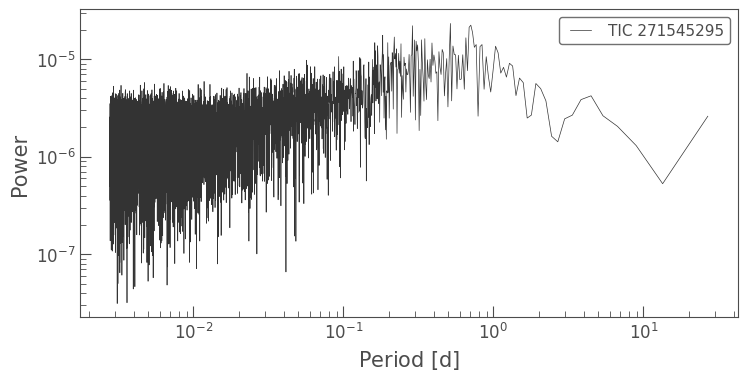

In [116]:
pg.plot(view='period', scale='log');


## Kepler Data

In [151]:
search_result = lk.search_lightcurve("KIC 9163520", author="Kepler", cadence="long")
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 01,2009,Kepler,1800,kplr009163520,0.0


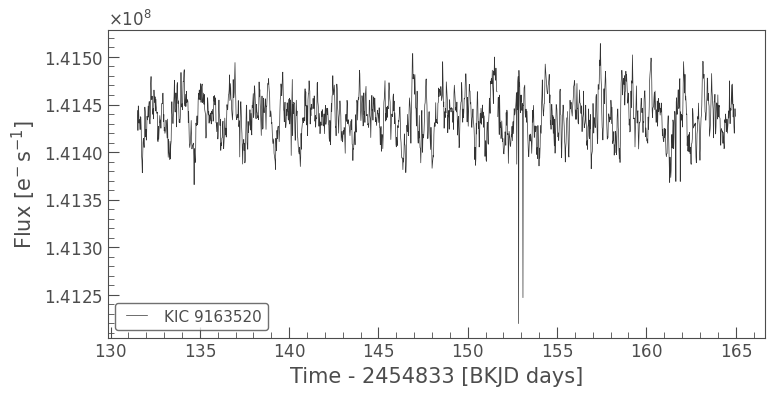

In [137]:
lc = lk.search_lightcurve('KIC 9163520', author="Kepler",quarter=1).download()
lc.plot();

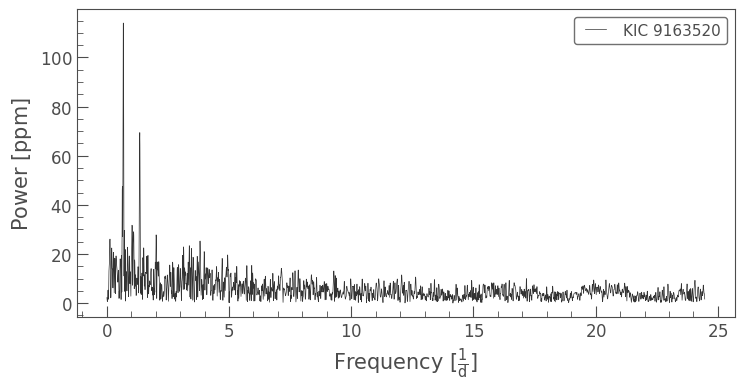

In [138]:
pg = lc.normalize(unit='ppm').to_periodogram()
pg.plot();


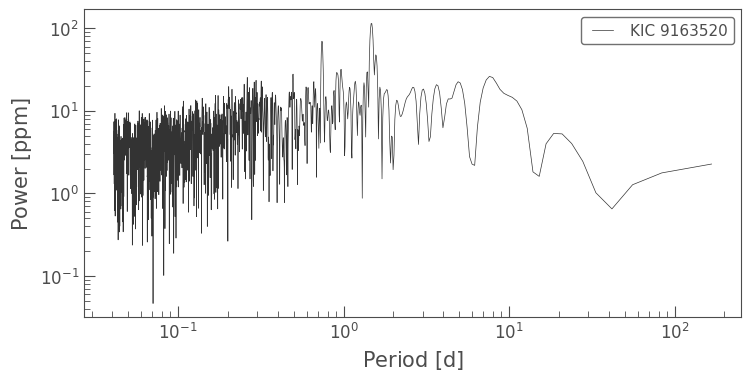

In [139]:
pg.plot(view='period', scale='log');


In [140]:
pg.show_properties()


lightkurve.Periodogram properties:
      Attribute         Description   Units
---------------------- -------------- -----
                nterms              1      
              targetid        9163520      
          default_view      frequency      
                 label    KIC 9163520      
             ls_method           fast      
frequency_at_max_power         0.6752 1 / d
             max_power       113.9798   ppm
               nyquist        24.4686 1 / d
   period_at_max_power          1.481     d
             frequency  array (4094,) 1 / d
                period  array (4094,)     d
                 power  array (4094,)   ppm
                  meta <class 'dict'>      


In [141]:
period = pg.period_at_max_power
period

<Quantity 1.48103926 d>

In [147]:
flat_lc = lc.flatten(window_length=1001)
clipped_lc = flat_lc.remove_outliers(sigma=6)

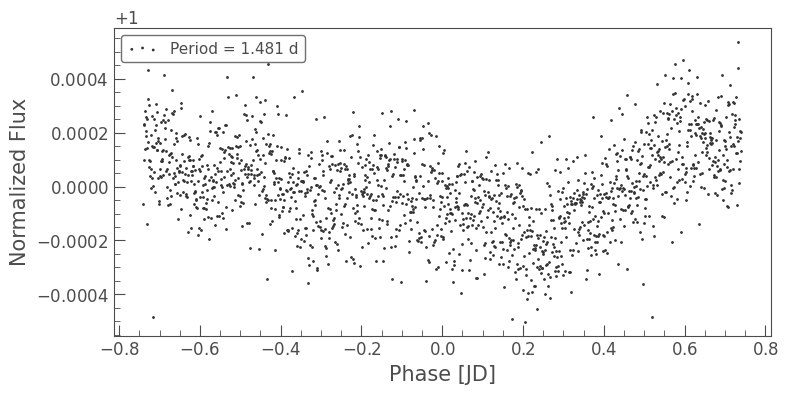

In [148]:
clipped_lc.fold(period).scatter(label=f'Period = {period.value:.3f} d');


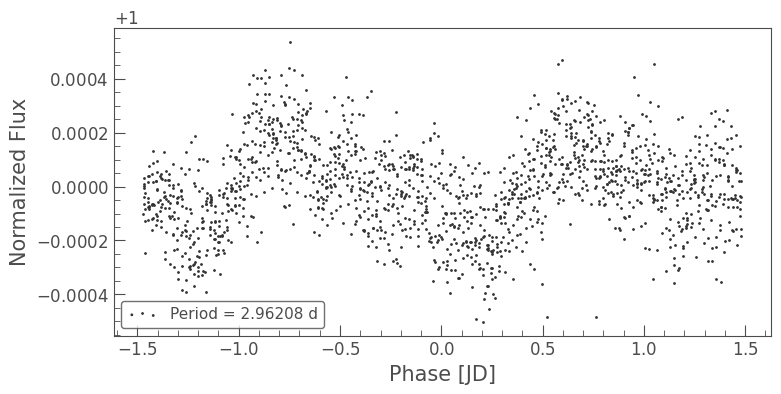

In [149]:
clipped_lc.fold(2*period).scatter(label=fr'Period = {2*period.value:.5f} d');


In [158]:
folded_lc = clipped_lc.fold(2*period)

ValueError: x and y must have same first dimension, but have shapes (1,) and (1622,)

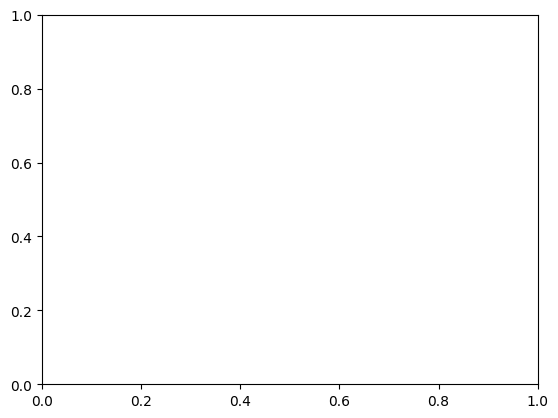

In [162]:
plt.plot(folded_lc.,folded_lc.flux)

In [173]:
A = clipped_lc.remove_nans().fold(period=2*period).bin(time_bin_size=0.001)


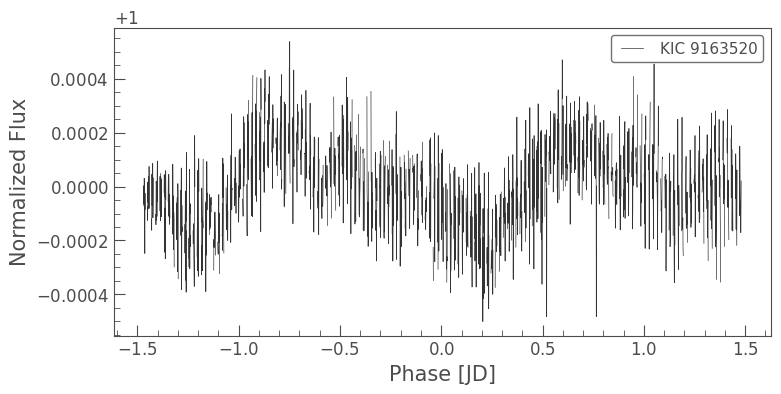

In [174]:
A.plot();

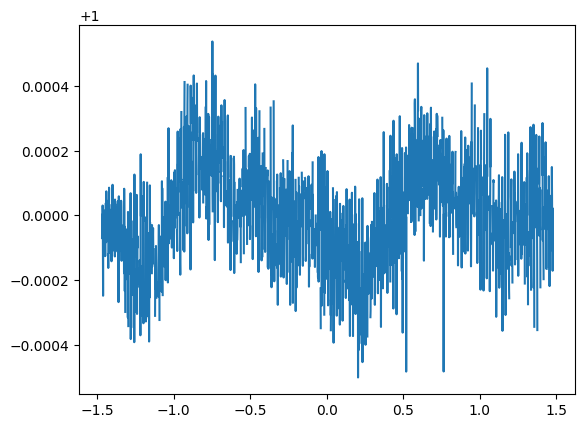

In [189]:
phase_in_days = A.phase.to_value('jd')
phase_in_sec = A.phase.to_value('sec')
plt.plot(phase_in_days,A.flux)

### Let's make a model

In [196]:
with pm.Model() as model:

    # Priors
    contrast = pm.Uniform("contrast", lower=0.0, upper=1.0, testval=0.5)
    radius = pm.Uniform("radius", lower=10.0, upper=35.0, testval=15.0)
    lat = pm.Uniform("lat", lower=-90.0, upper=90.0, testval=0.1)
    lon = pm.Uniform("lon", lower=-180.0, upper=180.0, testval=0.1)

    # Instantiate the map and add the spot
    map = starry.Map(ydeg=15)
    map.inc = inc
    map.spot(contrast=contrast, radius=radius, lat=lat, lon=lon)

    # Compute the flux model
    flux_model = map.flux(theta=360.0 / P * t)
    pm.Deterministic("flux_model", flux_model)

    # Save our initial guess
    flux_model_guess = pmx.eval_in_model(flux_model)

    # The likelihood function assuming known Gaussian uncertainty
    pm.Normal("obs", mu=flux_model, sd=flux_err, observed=flux)

ValueError: setting an array element with a sequence.